In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

In [2]:
group1 = pd.read_csv('group1.csv')
group1_stn = list(group1['stn'].values)
stn1 = []
for v in group1_stn:
    if v not in stn1:
        stn1.append(v)
print(stn1)

[13]


In [3]:
group2 = pd.read_csv('group2.csv')
group2_stn = list(group2['stn'].values)
stn2 = []
for v in group2_stn:
    if v not in stn2:
        stn2.append(v)
print(stn2)

[131, 132, 133, 138, 143, 146, 152, 156, 159, 165]


In [4]:
group3 = pd.read_csv('group3.csv')
group3_stn = list(group3['stn'].values)
stn3 = []
for v in group3_stn:
    if v not in stn3:
        stn3.append(v)
print(stn3)

[105, 108, 112, 115]


In [38]:
train1 = pd.read_csv('./uv_train_cloud.csv')
vali1 = pd.read_csv('uv_test_cloud.csv')

In [6]:
train1['rainfall'].isnull().sum()

1509402

In [26]:
train1 = train1.drop(['rainfall'], axis=1)
val1 = val1.drop(['rainfall'], axis=1)

In [8]:
group1_stn = list(train1['stn'].values)
stn1 = []
for v in group1_stn:
    if v not in stn1:
        stn1.append(v)
print(stn1)

[13, 105, 108, 112, 115, 131, 132, 133, 138, 143, 146, 152, 156, 159, 165]


In [9]:
##13, 132 따로

In [ ]:
## interpolation을 trian,검증셋 -> stn별로 정렬해서 하는거 코드 체인지!!!
# all_inter = pd.DataFrame()
# for i in stn1:
#     inter = uv_train1[uv_train1['stn'].isin([i])]
#     inter = inter.interpolate(method ='linear') 
#     all_inter = pd.concat([all_inter, inter])
# uv_train1 = all_inter.sort_index()  
# uv_train1 = uv_train1.interpolate(method ='linear') 

In [39]:
# stn1 = [105, 108, 112, 115, 131, 133, 
#         138, 143, 146, 152, 156, 159, 165]
stn1 = [105, 112, 115, 108]
stn2 = [131, 133, 138, 152, 156, 159, 165, 143, 146]
stn3 = [13, 132]


# 해당 관측소에 해당하는 부분만 추려냄
uv_train1 = train1[train1['stn'].isin(stn1)]
uv_train2 = train1[train1['stn'].isin(stn2)]
uv_train3 = train1[train1['stn'].isin(stn3)]


val1 = vali1[vali1['stn'].isin(stn1)]
val2 = vali1[vali1['stn'].isin(stn2)]
val3 = vali1[vali1['stn'].isin(stn3)]

In [40]:
val3 = val3.drop(['total_cloud', 'ml_cloud'], axis=1)
val3

,yyyymmdd,hhnn,stn,Lon,Lat,UV,Band1,Band2,Band3,Band4,...,Band13,Band14,Band15,Band16,SolarZA,SateZA,ESR,Height,LandType,rainfall
0,20220601,0,13,126.16,33.30,NaN,0.00000,0.00000,-0.000600,0.000600,...,251.490920,250.119130,248.786860,243.126010,123.72706,38.96359,-5.16304,71.0,0,NaN
6,20220601,0,132,126.33,36.54,NaN,0.00000,-0.00057,0.000000,0.000450,...,264.528690,263.528310,261.442970,251.453170,120.59151,42.62037,-4.73492,47.0,0,NaN
15,20220601,10,13,126.16,33.30,NaN,-0.00057,0.00000,-0.000300,0.000750,...,247.102800,245.689140,244.421340,239.842750,124.10999,38.96359,-5.16304,71.0,0,NaN
21,20220601,10,132,126.33,36.54,NaN,-0.00057,-0.00057,-0.000890,-0.000600,...,266.597010,265.675300,263.525220,252.856460,120.94071,42.62037,-4.73492,47.0,0,NaN
30,20220601,20,13,126.16,33.30,NaN,-0.00057,0.00000,0.000244,0.000525,...,251.704484,250.828489,249.120726,243.423005,124.39329,38.96359,-5.16304,71.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51816,20220624,2340,132,126.33,36.54,NaN,-0.00057,-0.00057,0.000000,0.000150,...,284.507210,283.973190,281.238530,266.193310,118.00703,42.62037,-3.94212,47.0,0,NaN
51825,20220624,2350,13,126.16,33.30,NaN,0.00000,0.00000,-0.001190,-0.000450,...,292.680570,292.750220,290.232680,274.122840,121.64697,38.96359,-4.34718,71.0,0,NaN
51831,20220624,2350,132,126.33,36.54,NaN,0.00000,-0.00057,0.000600,-0.000300,...,289.546910,289.546580,287.064720,271.269150,118.56659,42.62037,-3.94212,47.0,0,NaN
51840,20220625,0,13,126.16,33.30,NaN,0.00000,0.00000,0.000300,-0.000300,...,291.642320,291.105180,288.085610,272.468720,122.16167,38.96359,-4.91886,71.0,0,NaN


In [41]:
all_inter = pd.DataFrame()
for i in stn1:
    inter = uv_train1[uv_train1['stn'].isin([i])]
    inter = inter.interpolate(method ='linear') 
    all_inter = pd.concat([all_inter, inter])
uv_train1 = all_inter.sort_index()  

all_inter = pd.DataFrame()
for i in stn2:
    inter = uv_train2[uv_train2['stn'].isin([i])]
    inter = inter.interpolate(method ='linear') 
    all_inter = pd.concat([all_inter, inter])
uv_train2 = all_inter.sort_index()  


all_inter = pd.DataFrame()
for i in stn1:
    inter = val1[val1['stn'].isin([i])]
    inter = inter.interpolate(method ='linear') 
    all_inter = pd.concat([all_inter, inter])
val1 = all_inter.sort_index()  

all_inter = pd.DataFrame()
for i in stn2:
    inter = val2[val2['stn'].isin([i])]
    inter = inter.interpolate(method ='linear') 
    all_inter = pd.concat([all_inter, inter])
val2 = all_inter.sort_index()  

# all_inter = pd.DataFrame()         ## uv_train3는 cloud 피쳐 이용 못함 전부다 nan이므로
# for i in stn3:
#     inter = uv_train3[uv_train3['stn'].isin([i])]
#     inter = inter.interpolate(method ='linear') 
#     all_inter = pd.concat([all_inter, inter])
# uv_train3 = all_inter.sort_index()  

In [32]:
val2.isna().sum()

yyyymmdd       0.0
hhnn           0.0
stn            0.0
Lon            0.0
Lat            0.0
UV             0.0
Band1          0.0
Band2          0.0
Band3          0.0
Band4          0.0
Band5          0.0
Band6          0.0
Band7          0.0
Band8          0.0
Band9          0.0
Band10         0.0
Band11         0.0
Band12         0.0
Band13         0.0
Band14         0.0
Band15         0.0
Band16         0.0
SolarZA        0.0
SateZA         0.0
ESR            0.0
Height         0.0
LandType       0.0
total_cloud    0.0
ml_cloud       0.0
dtype: float64

In [42]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [43]:
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
import lightgbm as lgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")

In [18]:
uv_train1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band14,band15,band16,solarza,sateza,esr,height,landtype,total_cloud,ml_cloud
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,...,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,0.0,0.0
2,20200101,0,108,126.96500,37.57100,0.0,0.00000,0.00000,-0.00089,-0.00075,...,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,9.0,9.0
3,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,...,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,9.0,9.0
4,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,7.0,7.0
16,20200101,10,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00045,...,268.53498,268.08594,256.90085,164.12129,43.95463,-9.40930,26.04,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533586,20211231,2340,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00119,-0.00015,...,264.20253,263.47143,253.27381,162.03995,43.74521,-9.00798,222.80,4,NaN,NaN
1533598,20211231,2350,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,0.00000,...,263.45704,263.13011,253.51155,162.07968,43.95463,-8.90375,26.04,3,NaN,NaN
1533599,20211231,2350,108,126.96500,37.57100,0.0,0.00000,-0.00057,0.00030,-0.00030,...,262.99242,262.84181,253.23413,161.20883,43.77999,-8.81055,85.50,3,NaN,NaN
1533600,20211231,2350,112,126.62490,37.47772,0.0,-0.00057,0.00000,-0.00089,0.00015,...,267.67097,267.10261,255.66655,161.09608,43.67046,-8.79549,68.99,3,NaN,NaN


# 조금씩 step하고 잘 나오면 점차 늘리기

In [45]:
from optuna.samplers import TPESampler

# ###stn1 train set
# train1 = train1.drop(['total_cloud', 'ml_cloud'], axis=1)


# uv_train1_val = train1[(train1['yyyymmdd'] >= 20210601) & (uv_train1['yyyymmdd'] < 20210701)]
# idx1 = uv_train1_val.index
# all_group1 = uv_train1.drop(train1.index[idx1])

# X = all_group1[['hhnn','band1', 'band2','band3', 'band7',
#        'band11', 'band12', 'band13', 'solarza','esr', 'height']]
# Y = all_group1['uv']

x = uv_train1[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height', 'total_cloud', 'ml_cloud']]
y = uv_train1['uv']



X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=123)

# X_train1 = pd.concat([X,X_train1])
# y_train1 = pd.concat([Y,y_train1])




sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train1, label=y_train1)
    dtest = lgb.Dataset(X_test1, label=y_test1)

    param = {

        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',6, 15),
        "num_leaves": trial.suggest_int("num_leaves", 31, 1000),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 6000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9)
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train1, y_train1, eval_set=[(X_test1, y_test1)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test1, lgb_model.predict(X_test1))
    return rmse
        
study_lgb1 = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb1.optimize(objective, n_trials=10)

[I 2022-07-30 17:17:05,837] A new study created in memory with name: no-name-d3d872aa-e128-478a-a44d-368a05447195
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-30 17:18:19,684] Trial 0 finished with value: 0.37099336701386565 and parameters: {'max_depth': 13, 'num_leaves': 51, 'learning_rat

[I 2022-07-30 17:34:45,815] Trial 7 finished with value: 0.9576034036738336 and parameters: {'max_depth': 7, 'num_leaves': 411, 'learning_rate': 0.00015378739805285157, 'n_estimators': 5106, 'min_child_samples': 19, 'subsample': 0.5687409490746276, 'colsample_bytree': 0.8888521424477602}. Best is trial 4 with value: 0.3422670299252579.
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbo

In [46]:
###stn2 train set
# train1 = train1.drop(['total_cloud', 'ml_cloud'], axis=1)


# uv_train2_val = train1[(train1['yyyymmdd'] >= 20210601) & (uv_train2['yyyymmdd'] < 20210701)]
# idx2 = uv_train2_val.index
# all_group2 = uv_train2.drop(train1.index[idx2])

# X = all_group2[['hhnn','band1', 'band2','band3', 'band7',
#        'band11', 'band12', 'band13', 'solarza','esr', 'height']]
# Y = all_group2['uv']

x = uv_train2[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height','total_cloud', 'ml_cloud']]
y = uv_train2['uv']

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=123)

# X_train2 = pd.concat([X,X_train2])
# y_train2 = pd.concat([Y,y_train2])

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train2, label=y_train2)
    dtest = lgb.Dataset(X_test2, label=y_test2)

    param = {

        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',6, 15),
        "num_leaves": trial.suggest_int("num_leaves", 31, 1000),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 6000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9)
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train2, y_train2, eval_set=[(X_test2, y_test2)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test2, lgb_model.predict(X_test2))
    return rmse
        
study_lgb2 = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb2.optimize(objective, n_trials=10)

[I 2022-07-30 17:39:14,657] A new study created in memory with name: no-name-71500a81-a311-4272-bd9c-adbb8bd39431
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-30 17:43:15,267] Trial 0 finished with value: 0.39923062067145 and parameters: {'max_depth': 13, 'num_leaves': 51, 'learning_rate':

[I 2022-07-30 18:22:40,827] Trial 7 finished with value: 1.024421231246963 and parameters: {'max_depth': 7, 'num_leaves': 411, 'learning_rate': 0.00015378739805285157, 'n_estimators': 5106, 'min_child_samples': 19, 'subsample': 0.5687409490746276, 'colsample_bytree': 0.8888521424477602}. Best is trial 4 with value: 0.3698715888731143.
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbos

# STN3는 따로 안 돌려 됨!! 앞에서 한거그대로 ㅇㅇ

In [45]:
###stn3 train set
# train1 = train1.drop(['total_cloud', 'ml_cloud'], axis=1)


# uv_train3_val = train1[(train1['yyyymmdd'] >= 20210601) & (uv_train3['yyyymmdd'] < 20210701)]
# idx3 = uv_train3_val.index
# all_group3 = uv_train3.drop(train1.index[idx3])

# X = all_group3[['hhnn','band1', 'band2','band3', 'band7',
#        'band11', 'band12', 'band13', 'solarza','esr', 'height']]
# Y = all_group3['uv']

x = uv_train3[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
y = uv_train3['uv']

X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=123)

X_train3 = pd.concat([X,X_train3])
y_train3 = pd.concat([Y,y_train3])

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train3, label=y_train3)
    dtest = lgb.Dataset(X_test3, label=y_test3)

    param = {

        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',6, 15),
        "num_leaves": trial.suggest_int("num_leaves", 31, 1000),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 6000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9)
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train3, y_train3, eval_set=[(X_test3, y_test3)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test3, lgb_model.predict(X_test3))
    return rmse
        
study_lgb3 = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb3.optimize(objective, n_trials=20)

[I 2022-07-30 14:56:24,744] A new study created in memory with name: no-name-f1fe12dd-f2fa-4596-909d-aab49f7674b0
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-30 14:58:57,597] Trial 0 finished with value: 0.4162540413515489 and parameters: {'max_depth': 13, 'num_leaves': 51, 'learning_rate

[I 2022-07-30 15:21:30,336] Trial 7 finished with value: 0.9556159972282499 and parameters: {'max_depth': 7, 'num_leaves': 411, 'learning_rate': 0.00015378739805285157, 'n_estimators': 5106, 'min_child_samples': 19, 'subsample': 0.5687409490746276, 'colsample_bytree': 0.8888521424477602}. Best is trial 4 with value: 0.3748805609393445.
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbo

[I 2022-07-30 15:51:30,902] Trial 15 finished with value: 0.3775569500935718 and parameters: {'max_depth': 9, 'num_leaves': 756, 'learning_rate': 0.00671446321487449, 'n_estimators': 4091, 'min_child_samples': 84, 'subsample': 0.4928889781061034, 'colsample_bytree': 0.7314077878016134}. Best is trial 11 with value: 0.36951928476684925.
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbo

In [47]:
trial1 = study_lgb1.best_trial
trial_params1 = trial1.params
print('Best Trial: score {},\nparams {}'.format(trial1.value, trial_params1))

Best Trial: score 0.33882621936805823,
params {'max_depth': 15, 'num_leaves': 473, 'learning_rate': 0.004489993245608611, 'n_estimators': 2257, 'min_child_samples': 62, 'subsample': 0.9148141423618992, 'colsample_bytree': 0.806911589760363}


In [48]:
final_lgb_model1 = lgb.LGBMRegressor(**trial_params1)
final_lgb_model1.fit(X_train1, y_train1, verbose=True)

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(colsample_bytree=0.806911589760363,
              learning_rate=0.004489993245608611, max_depth=15,
              min_child_samples=62, n_estimators=2257, num_leaves=473,
              subsample=0.9148141423618992)

In [52]:
val1.columns

Index(['yyyymmdd', 'hhnn', 'stn', 'Lon', 'Lat', 'UV', 'Band1', 'Band2',
       'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'Band8', 'Band9', 'Band10',
       'Band11', 'Band12', 'Band13', 'Band14', 'Band15', 'Band16', 'SolarZA',
       'SateZA', 'ESR', 'Height', 'LandType', 'total_cloud', 'ml_cloud',
       'rainfall'],
      dtype='object')

In [49]:
import joblib

#save your model or results
joblib.dump(final_lgb_model1, 'cloud_group1.pkl')

['cloud_group1.pkl']

In [53]:
val1 = val1[['hhnn','Band1', 'Band2','Band3', 'Band7', \
       'Band11', 'Band12', 'Band13', 'SolarZA','ESR', 'Height','total_cloud', 'ml_cloud']]
val2 = val2[['hhnn','Band1', 'Band2','Band3', 'Band7', \
       'Band11', 'Band12', 'Band13', 'SolarZA','ESR', 'Height','total_cloud', 'ml_cloud']]
val3 = val3[['hhnn','Band1', 'Band2','Band3', 'Band7', \
       'Band11', 'Band12', 'Band13', 'SolarZA','ESR', 'Height']]

In [54]:
final_lgb_pred1 = final_lgb_model1.predict(val1)
print(final_lgb_pred1)
np.save('pred_cloud_group1.npy',final_lgb_pred1)

[ 3.90189262e-05  8.29404743e-04  7.03114950e-04 ... -1.35801057e-03
  3.51639754e-04 -6.75598169e-04]


<BarContainer object of 13 artists>

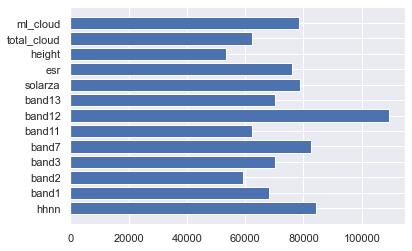

In [55]:
plt.barh(X_train1.columns, final_lgb_model1.feature_importances_)

In [56]:
trial2 = study_lgb2.best_trial
trial_params2 = trial2.params
print('Best Trial: score {},\nparams {}'.format(trial2.value, trial_params2))

Best Trial: score 0.3696966066056202,
params {'max_depth': 15, 'num_leaves': 473, 'learning_rate': 0.004489993245608611, 'n_estimators': 2257, 'min_child_samples': 62, 'subsample': 0.9148141423618992, 'colsample_bytree': 0.806911589760363}


In [57]:
final_lgb_model2 = lgb.LGBMRegressor(**trial_params2)
final_lgb_model2.fit(X_train2, y_train2)

LGBMRegressor(colsample_bytree=0.806911589760363,
              learning_rate=0.004489993245608611, max_depth=15,
              min_child_samples=62, n_estimators=2257, num_leaves=473,
              subsample=0.9148141423618992)

In [58]:
import joblib

#save your model or results
joblib.dump(final_lgb_model2, 'cloud_group2.pkl')

['cloud_group2.pkl']

In [59]:
final_lgb_pred2 = final_lgb_model2.predict(val2)
print(final_lgb_pred2)
np.save('pred_cloud_group2.npy',final_lgb_pred2)

[ 0.00138944  0.00258063 -0.0013199  ...  0.00385697  0.00352429
 -0.00013488]


<BarContainer object of 13 artists>

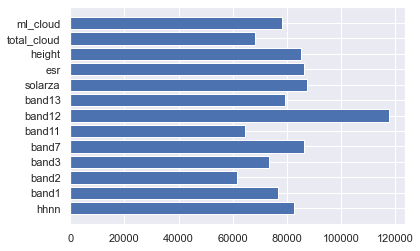

In [60]:
plt.barh(X_train2.columns, final_lgb_model2.feature_importances_)

In [46]:
# trial3 = study_lgb3.best_trial
# trial_params3 = trial3.params
# print('Best Trial: score {},\nparams {}'.format(trial3.value, trial_params3))

Best Trial: score 0.36319524570478035,
params {'max_depth': 15, 'num_leaves': 661, 'learning_rate': 0.005685080173251255, 'n_estimators': 5946, 'min_child_samples': 44, 'subsample': 0.5075314090481482, 'colsample_bytree': 0.7336943852623083}


In [47]:
# final_lgb_model3 = lgb.LGBMRegressor(**trial_params3)
# final_lgb_model3.fit(X_train3, y_train3)

LGBMRegressor(colsample_bytree=0.7336943852623083,
              learning_rate=0.005685080173251255, max_depth=15,
              min_child_samples=44, n_estimators=5946, num_leaves=661,
              subsample=0.5075314090481482)

In [48]:
# import joblib

# #save your model or results
# joblib.dump(final_lgb_model3, 'cloud_group3.pkl')

['cloud_group3.pkl']

In [116]:
# final_lgb_pred3 = final_lgb_model3.predict(val3)
# print(final_lgb_pred3)
# np.save('pred_cloud_group3.npy',final_lgb_pred3)

[ 0.00075226  0.0008952  -0.00115664 ... -0.00277967 -0.00060293
 -0.00273254]


In [61]:
final_lgb_pred3 = np.load('pred_group3.npy')
final_lgb_pred3

array([ 0.00075226,  0.0008952 , -0.00115664, ..., -0.00277967,
       -0.00060293, -0.00273254])

In [62]:
# plt.barh(X_train3.columns, final_lgb_model3.feature_importances_)

NameError: name 'X_train3' is not defined

In [63]:
submission = pd.read_csv('1-1_검증데이터셋.csv')
submission1 = submission.copy()
submission1

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,NaN
1,202206010000,105,NaN
2,202206010000,108,NaN
3,202206010000,112,NaN
4,202206010000,115,NaN
...,...,...,...
51850,202206250000,146,NaN
51851,202206250000,152,NaN
51852,202206250000,156,NaN
51853,202206250000,159,NaN


In [64]:
sub1 = submission1[submission1['STN'].isin(stn1)]
sub2 = submission1[submission1['STN'].isin(stn2)]
sub3 = submission1[submission1['STN'].isin(stn3)]

sub1['UV'] = final_lgb_pred1
sub2['UV'] = final_lgb_pred2
sub3['UV'] = final_lgb_pred3

sub = pd.concat([sub1,sub2,sub3],axis=0)
sub

C:\Users\wjd72\AppData\Local\Temp\ipykernel_12384\3663906337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['UV'] = final_lgb_pred1
C:\Users\wjd72\AppData\Local\Temp\ipykernel_12384\3663906337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2['UV'] = final_lgb_pred2
C:\Users\wjd72\AppData\Local\Temp\ipykernel_12384\3663906337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,YearMonthDayHourMinute,STN,UV
1,202206010000,105,0.000039
2,202206010000,108,0.000829
3,202206010000,112,0.000703
4,202206010000,115,0.000322
16,202206010010,105,0.000298
...,...,...,...
51816,202206242340,132,0.000143
51825,202206242350,13,-0.000320
51831,202206242350,132,-0.002780
51840,202206250000,13,-0.000603


In [65]:
sub = sub.sort_values(['YearMonthDayHourMinute','STN'])
sub

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.000752
1,202206010000,105,0.000039
2,202206010000,108,0.000829
3,202206010000,112,0.000703
4,202206010000,115,0.000322
...,...,...,...
51850,202206250000,146,0.020919
51851,202206250000,152,0.003135
51852,202206250000,156,0.003857
51853,202206250000,159,0.003524


In [68]:
sub.to_csv('220224_lgbm_lat_by_group_cloud.csv', index=False)

<AxesSubplot:>

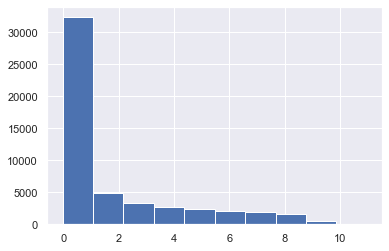

In [66]:
sub['UV'].hist()

In [67]:
li = list(sub['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,13.680455
0_1,47.929804
1_2,8.878604
2_3,6.294475
3_4,4.952271
4_5,4.296596
5_6,3.903192
6_7,3.575354
7_8,3.378652
8_9,2.391283


In [ ]:
#-----------------------end-----------

In [63]:
# all_inter = pd.DataFrame()
# for i in stn1:
#     inter = uv_train1[uv_train1['stn'].isin([i])]
#     inter = inter.interpolate(method ='linear') 
#     all_inter = pd.concat([all_inter, inter])
# uv_train1 = all_inter.sort_index()  
# uv_train1 = uv_train1.interpolate(method ='linear') 

In [64]:
# uv_train1 = all_inter.sort_index()


In [65]:
# uv_train1 = uv_train1.interpolate(method ='linear') 

In [66]:
uv_train1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band14,band15,band16,solarza,sateza,esr,height,landtype,total_cloud,ml_cloud
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,...,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,0.0,0.0
2,20200101,0,108,126.96500,37.57100,0.0,0.00000,0.00000,-0.00089,-0.00075,...,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,9.0,9.0
3,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,...,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,9.0,9.0
4,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,7.0,7.0
16,20200101,10,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00045,...,268.53498,268.08594,256.90085,164.12129,43.95463,-9.40930,26.04,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533586,20211231,2340,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00119,-0.00015,...,264.20253,263.47143,253.27381,162.03995,43.74521,-9.00798,222.80,4,9.0,9.0
1533598,20211231,2350,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,0.00000,...,263.45704,263.13011,253.51155,162.07968,43.95463,-8.90375,26.04,3,2.0,0.0
1533599,20211231,2350,108,126.96500,37.57100,0.0,0.00000,-0.00057,0.00030,-0.00030,...,262.99242,262.84181,253.23413,161.20883,43.77999,-8.81055,85.50,3,0.0,0.0
1533600,20211231,2350,112,126.62490,37.47772,0.0,-0.00057,0.00000,-0.00089,0.00015,...,267.67097,267.10261,255.66655,161.09608,43.67046,-8.79549,68.99,3,3.0,0.0


In [13]:
# uv_train2 = uv_train2.drop(['total_cloud','ml_cloud'], axis=1)


In [14]:
# uv_train2.isnull().sum()

yyyymmdd    0
hhnn        0
stn         0
lon         0
lat         0
uv          0
band1       0
band2       0
band3       0
band4       0
band5       0
band6       0
band7       0
band8       0
band9       0
band10      0
band11      0
band12      0
band13      0
band14      0
band15      0
band16      0
solarza     0
sateza      0
esr         0
height      0
landtype    0
dtype: int64

In [68]:
# uv_train2

In [70]:
uv_train1_val = uv_train1[(uv_train1['yyyymmdd'] >= 20210601) & (uv_train1['yyyymmdd'] < 20210701)]
idx1 = uv_train1_val.index
all_group1 = uv_train1.drop(uv_train1.index[idx1])

X = all_group1[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height','total_cloud','ml_cloud']]
Y = all_group1['uv']

x = uv_train1_val[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height','total_cloud','ml_cloud']]
y = uv_train1_val['uv']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

X_train = pd.concat([X,X_train])
y_train = pd.concat([Y,y_train])




IndexError: index 1081632 is out of bounds for axis 0 with size 406988

In [10]:
import seaborn as sns

In [11]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
X_train.info()
y_train.info()
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313980 entries, 1 to 1140646
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   hhnn         1313980 non-null  int64  
 1   band1        1313980 non-null  float64
 2   band2        1313980 non-null  float64
 3   band3        1313980 non-null  float64
 4   band7        1313980 non-null  float64
 5   band11       1313980 non-null  float64
 6   band12       1313980 non-null  float64
 7   band13       1313980 non-null  float64
 8   solarza      1313980 non-null  float64
 9   esr          1313980 non-null  float64
 10  height       1313980 non-null  float64
 11  total_cloud  1313980 non-null  float64
 12  ml_cloud     1313980 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 140.3 MB
<class 'pandas.core.series.Series'>
Int64Index: 1313980 entries, 1 to 1140646
Series name: uv
Non-Null Count    Dtype  
--------------    -----  
1313980 non-null  float64
dt

In [ ]:

colsample_bytree=0.9
max_depth = 7
n_estimators = 4000             # 400  #1000
lr = 0.02                     # 0.017
num_leaves = 511
early_stopping_rounds = 100      # 100
verbose = False   


lgbm_reg = LGBMRegressor(objective= "regression",
                     colsample_bytree = colsample_bytree,
                     max_depth= max_depth,
                     n_estimators= n_estimators,
                     learning_rate= lr,
                     num_leaves = num_leaves)

lgbm_reg.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          eval_metric=["rmse"],
          early_stopping_rounds=early_stopping_rounds,
          verbose=verbose) 

In [12]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [ ]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_test, label=y_test)

    param = {

        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',6, 15),
        "num_leaves": trial.suggest_int("num_leaves", 31, 1000),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 6000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9)
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test, lgb_model.predict(X_test))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-07-29 11:15:57,203] A new study created in memory with name: no-name-8e92ada5-7d8f-4f7a-bec8-25666da2d597
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-29 11:19:21,627] Trial 0 finished with value: 0.5506722962126299 and parameters: {'max_depth': 13, 'num_leaves': 1188, 'learning_rate': 0.001850531

[I 2022-07-29 11:34:20,416] Trial 7 finished with value: 1.2727147836733927 and parameters: {'max_depth': 7, 'num_leaves': 4154, 'learning_rate': 0.00015378739805285157, 'n_estimators': 5106, 'min_child_samples': 19, 'subsample': 0.5687409490746276, 'colsample_bytree': 0.8888521424477602}. Best is trial 4 with value: 0.5501441570159628.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is

[I 2022-07-29 11:46:57,198] Trial 15 finished with value: 0.5515907383175953 and parameters: {'max_depth': 9, 'num_leaves': 6993, 'learning_rate': 0.00671446321487449, 'n_estimators': 4091, 'min_child_samples': 84, 'subsample': 0.4928889781061034, 'colsample_bytree': 0.7314077878016134}. Best is trial 11 with value: 0.5486874484173067.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is 

[I 2022-07-29 12:05:46,797] Trial 23 finished with value: 0.5481100282268564 and parameters: {'max_depth': 12, 'num_leaves': 7269, 'learning_rate': 0.0034124068246147274, 'n_estimators': 5410, 'min_child_samples': 58, 'subsample': 0.46636186839398663, 'colsample_bytree': 0.7485115020988216}. Best is trial 21 with value: 0.5477187159519797.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument

[I 2022-07-29 12:51:40,000] Trial 31 finished with value: 0.5477463265796153 and parameters: {'max_depth': 12, 'num_leaves': 7196, 'learning_rate': 0.005081606560015477, 'n_estimators': 5018, 'min_child_samples': 56, 'subsample': 0.47918863956968966, 'colsample_bytree': 0.7449119209001478}. Best is trial 21 with value: 0.5477187159519797.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument 

[I 2022-07-29 13:10:08,368] Trial 39 finished with value: 0.5490459561446127 and parameters: {'max_depth': 14, 'num_leaves': 5628, 'learning_rate': 0.005086309247099096, 'n_estimators': 4820, 'min_child_samples': 61, 'subsample': 0.48773513583688155, 'colsample_bytree': 0.7430662611607077}. Best is trial 21 with value: 0.5477187159519797.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument 

In [45]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_test, label=y_test)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test, lgb_model.predict(X_test))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-07-28 23:28:26,500] A new study created in memory with name: no-name-e540c7f7-8860-400a-9b5e-e05b998592f7
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:28:39,680] Trial 0 finished with value: 2.282604189992743 and parameters: {'max_depth': 13, 'learning_rate': 0.00011002817226254398, 'n_estim

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:29:55,500] Trial 8 finished with value: 0.6759579385567136 and parameters: {'max_depth': 10, 'learning_rate': 0.0043508488031796955, 'n_estimators': 478, 'min_child_samples': 87, 'subsample': 0.5520731753100153}. Best is trial 8 with value: 0.675957938556

[I 2022-07-28 23:31:49,488] Trial 16 finished with value: 0.5423403189600985 and parameters: {'max_depth': 13, 'learning_rate': 0.005297127609590053, 'n_estimators': 1981, 'min_child_samples': 43, 'subsample': 0.4037322308791715}. Best is trial 16 with value: 0.5423403189600985.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Ligh

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:34:14,407] Trial 25 finished with value: 0.5266846452030582 and parameters: {'max_depth': 9, 'learning_rate': 0.009657009839995498, 'n_estimators': 1715, 'min_child_samples': 6, 'subsample': 0.47680433020394963}. Best is trial 22 with value: 0.52147160824

[I 2022-07-28 23:36:06,903] Trial 33 finished with value: 0.5506981938706674 and parameters: {'max_depth': 11, 'learning_rate': 0.004625550783139468, 'n_estimators': 1847, 'min_child_samples': 5, 'subsample': 0.4508165834554608}. Best is trial 22 with value: 0.5214716082418841.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Light

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:38:19,269] Trial 42 finished with value: 0.5336865988105465 and parameters: {'max_depth': 11, 'learning_rate': 0.007710553933544465, 'n_estimators': 1716, 'min_child_samples': 19, 'subsample': 0.4500796472648804}. Best is trial 22 with value: 0.5214716082

[I 2022-07-28 23:40:15,110] Trial 50 finished with value: 0.5647983903510291 and parameters: {'max_depth': 14, 'learning_rate': 0.00413076207972142, 'n_estimators': 1467, 'min_child_samples': 49, 'subsample': 0.41248185926203224}. Best is trial 22 with value: 0.5214716082418841.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Ligh

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:42:35,112] Trial 59 finished with value: 0.5301174585578899 and parameters: {'max_depth': 13, 'learning_rate': 0.0082317666473781, 'n_estimators': 1763, 'min_child_samples': 26, 'subsample': 0.4139493469686168}. Best is trial 22 with value: 0.521471608241

[I 2022-07-28 23:44:32,484] Trial 67 finished with value: 0.5722687515958907 and parameters: {'max_depth': 8, 'learning_rate': 0.0037051083759212858, 'n_estimators': 1413, 'min_child_samples': 22, 'subsample': 0.5194709788219787}. Best is trial 22 with value: 0.5214716082418841.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Ligh

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:47:06,919] Trial 76 finished with value: 0.5395361597090803 and parameters: {'max_depth': 11, 'learning_rate': 0.005956436418024234, 'n_estimators': 1909, 'min_child_samples': 71, 'subsample': 0.4911939093981675}. Best is trial 72 with value: 0.5184938684

[I 2022-07-28 23:49:31,417] Trial 84 finished with value: 0.524210791601338 and parameters: {'max_depth': 13, 'learning_rate': 0.008675887439113546, 'n_estimators': 1954, 'min_child_samples': 68, 'subsample': 0.5804466216476378}. Best is trial 72 with value: 0.5184938684853763.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Light

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-07-28 23:52:07,608] Trial 93 finished with value: 1.2070023851043556 and parameters: {'max_depth': 12, 'learning_rate': 0.000457108525966519, 'n_estimators': 1901, 'min_child_samples': 59, 'subsample': 0.6074360403015646}. Best is trial 72 with value: 0.5184938684

In [46]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 0.5178388656678076,
params {'max_depth': 14, 'learning_rate': 0.009994761730516164, 'n_estimators': 1997, 'min_child_samples': 73, 'subsample': 0.622413509242086}


In [29]:

# colsample_bytree=0.9
# max_depth = 14
# n_estimators = 1997             # 400  #1000
# lr = 0.009994761730516164                     # 0.017
# num_leaves = 511
# early_stopping_rounds = 25      # 100
# verbose = False   
# min_child_samples =  73
# subsample =  0.6224

# lgbm_reg = LGBMRegressor(objective= "regression",
#                      colsample_bytree = colsample_bytree,
#                      max_depth= max_depth,
#                      n_estimators= n_estimators,
#                      learning_rate= lr,
#                      num_leaves = num_leaves,
#                      min_child_samples = min_child_samples,
#                      subsample = subsample   )

# lgbm_reg.fit(X_train, y_train,
#           eval_set=[(X_test, y_test)],
#           eval_metric=["rmse"],
#           early_stopping_rounds=early_stopping_rounds,
#           verbose=verbose) 

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(colsample_bytree=0.9, learning_rate=0.009994761730516164,
              max_depth=14, min_child_samples=73, n_estimators=1997,
              num_leaves=511, objective='regression', subsample=0.6224)

In [47]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_test, label=y_test)

    param = {
        'boosting_type': 'dart',
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test, lgb_model.predict(X_test))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-07-28 23:55:02,020] A new study created in memory with name: no-name-21ea1a84-3cf2-4ea0-9d08-d8856e1432c4
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Ear

[I 2022-07-29 00:03:21,533] Trial 6 finished with value: 1.741988869728136 and parameters: {'max_depth': 13, 'learning_rate': 0.0011048270653924235, 'n_estimators': 1827, 'min_child_samples': 35, 'subsample': 0.4345676420333751}. Best is trial 6 with value: 1.741988869728136.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGB

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 00:12:00,797] Trial 13 finished with value: 1.1462918494586196 and parameters: {'max_depth': 15, 'learning_rate': 0.003840113884729365, 'n_estimators': 1124, 'min_child_samples': 53, 'subsample': 0.9492608512059212}. Best is trial 12 with value: 0.9602784867687729.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be re

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 00:26:21,206] Trial 20 finished with value: 0.7656175770872774 and parameters: {'max_depth': 12, 'learning_rate': 0.006382650490155244, 'n_estimators': 1337, 'min_child_samples': 25, 'subsample': 0.5105698151318672}. Best is trial 17 with value: 0.6702773298994291.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be re

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 00:41:33,731] Trial 27 finished with value: 0.6161761373368377 and parameters: {'max_depth': 8, 'learning_rate': 0.008068250390452109, 'n_estimators': 1818, 'min_child_samples': 14, 'subsample': 0.4350593560838514}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be rem

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 00:53:49,217] Trial 34 finished with value: 0.6635952215881542 and parameters: {'max_depth': 7, 'learning_rate': 0.007421491811986854, 'n_estimators': 1626, 'min_child_samples': 19, 'subsample': 0.48532168505969076}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be re

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 01:07:45,128] Trial 41 finished with value: 0.599757621576694 and parameters: {'max_depth': 10, 'learning_rate': 0.00971374506381552, 'n_estimators': 1731, 'min_child_samples': 11, 'subsample': 0.44786439518330085}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be rem

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 01:21:33,017] Trial 48 finished with value: 2.1228555072339224 and parameters: {'max_depth': 5, 'learning_rate': 0.0006430407185245744, 'n_estimators': 1909, 'min_child_samples': 38, 'subsample': 0.6217552035731969}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be re

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 01:33:09,552] Trial 55 finished with value: 0.6227842217485392 and parameters: {'max_depth': 11, 'learning_rate': 0.008075067290088715, 'n_estimators': 1778, 'min_child_samples': 18, 'subsample': 0.46073238042114845}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be r

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 01:45:32,838] Trial 62 finished with value: 0.5992657399876563 and parameters: {'max_depth': 9, 'learning_rate': 0.009049467370186137, 'n_estimators': 1820, 'min_child_samples': 9, 'subsample': 0.43721908229312473}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be rem

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 02:00:19,589] Trial 69 finished with value: 0.6112947412113143 and parameters: {'max_depth': 11, 'learning_rate': 0.009956646640743014, 'n_estimators': 1653, 'min_child_samples': 62, 'subsample': 0.40388479123533144}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be r

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 02:14:34,805] Trial 76 finished with value: 0.6810282145410204 and parameters: {'max_depth': 12, 'learning_rate': 0.005855831826549814, 'n_estimators': 1888, 'min_child_samples': 13, 'subsample': 0.4008323198407156}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be re

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 02:28:52,303] Trial 83 finished with value: 0.6018380022077651 and parameters: {'max_depth': 8, 'learning_rate': 0.009079969308273124, 'n_estimators': 1931, 'min_child_samples': 21, 'subsample': 0.4612184773020328}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be rem

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 02:40:27,475] Trial 90 finished with value: 0.6536185449144643 and parameters: {'max_depth': 11, 'learning_rate': 0.008757287478091798, 'n_estimators': 1418, 'min_child_samples': 17, 'subsample': 0.5011224869887854}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be re

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2022-07-29 02:54:52,752] Trial 97 finished with value: 0.6434077930195317 and parameters: {'max_depth': 12, 'learning_rate': 0.00686953442027685, 'n_estimators': 1907, 'min_child_samples': 7, 'subsample': 0.6593743451887798}. Best is trial 22 with value: 0.5887487828286446.
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be remo

In [48]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 0.5887487828286446,
params {'max_depth': 12, 'learning_rate': 0.00992163826866627, 'n_estimators': 1852, 'min_child_samples': 45, 'subsample': 0.48011979989319653}


In [ ]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

In [ ]:

colsample_bytree=0.9
max_depth = 7
n_estimators = 4000             # 400  #1000
lr = 0.02                     # 0.017
num_leaves = 511
early_stopping_rounds = 100      # 100
verbose = False   


lgbm_reg = LGBMRegressor(objective= "regression",
                     colsample_bytree = colsample_bytree,
                     max_depth= max_depth,
                     n_estimators= n_estimators,
                     learning_rate= lr,
                     num_leaves = num_leaves)

lgbm_reg.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          eval_metric=["rmse"],
          early_stopping_rounds=early_stopping_rounds,
          verbose=verbose) 





In [21]:
sub = pd.read_csv('./uv_test_cloud.csv')

In [22]:
sub = sub.drop(['rainfall'], axis=1)

all_inter = pd.DataFrame()
for i in stn1:
    inter = sub[sub['stn'].isin([i])]
    inter = inter.interpolate(method ='linear') 
    all_inter = pd.concat([all_inter, inter])
    

In [23]:
sub1 = all_inter[all_inter['stn'].isin(stn1)]

In [24]:
sub1

,yyyymmdd,hhnn,stn,Lon,Lat,UV,Band1,Band2,Band3,Band4,...,Band14,Band15,Band16,SolarZA,SateZA,ESR,Height,LandType,total_cloud,ml_cloud
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.000000,-0.00030,...,261.145800,257.526580,246.95577,119.74915,43.95463,-4.61100,26.04,3,8.000000,0.0
16,20220601,10,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.000300,0.00030,...,263.135640,260.708670,249.80529,119.99587,43.95463,-4.61100,26.04,3,7.833333,0.0
31,20220601,20,105,128.89098,37.75147,NaN,-0.00057,0.00000,0.000187,0.00045,...,250.685579,249.017181,243.36946,120.15117,43.95463,-4.61100,26.04,3,7.666667,0.0
46,20220601,30,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.000890,-0.00015,...,244.416210,241.132400,234.91324,120.18497,43.95463,-4.61100,26.04,3,7.500000,0.0
61,20220601,40,105,128.89098,37.75147,NaN,-0.00057,-0.00057,-0.000600,0.00015,...,249.468530,246.545640,239.04355,120.06332,43.95463,-4.61100,26.04,3,7.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51794,20220624,2320,165,126.38121,34.81689,NaN,0.00000,0.00000,-0.000890,0.00000,...,290.095870,288.317840,273.42368,118.23785,40.67788,-4.16606,38.00,3,9.000000,9.0
51809,20220624,2330,165,126.38121,34.81689,NaN,-0.00057,0.00000,-0.000300,-0.00090,...,291.403550,289.257110,273.82366,118.98719,40.67788,-4.16606,38.00,3,9.000000,9.0
51824,20220624,2340,165,126.38121,34.81689,NaN,0.00000,-0.00057,-0.000300,-0.00030,...,291.322250,289.213910,273.75708,119.65269,40.67788,-4.16606,38.00,3,9.000000,9.0
51839,20220624,2350,165,126.38121,34.81689,NaN,0.00000,0.00000,0.000000,-0.00060,...,290.533410,288.636500,273.54047,120.23153,40.67788,-4.16606,38.00,3,9.000000,9.0


In [25]:
sub1.columns

Index(['yyyymmdd', 'hhnn', 'stn', 'Lon', 'Lat', 'UV', 'Band1', 'Band2',
       'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'Band8', 'Band9', 'Band10',
       'Band11', 'Band12', 'Band13', 'Band14', 'Band15', 'Band16', 'SolarZA',
       'SateZA', 'ESR', 'Height', 'LandType', 'total_cloud', 'ml_cloud'],
      dtype='object')

In [26]:
preds =lgbm_reg.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

sub1_test = sub1[['hhnn', 'Band1', 'Band2','Band3', 'Band7', 
       'Band11', 'Band12', 'Band13', 'SolarZA','ESR', 'Height','total_cloud', 'ml_cloud']]

pred1 =lgbm_reg.predict(sub1_test)

MSE: 0.145791


In [70]:
uv_train2_val = uv_train2[(uv_train2['yyyymmdd'] >= 20210601) & (uv_train2['yyyymmdd'] < 20210701)]
idx2 = uv_train2_val.index
all_group1 = uv_train2.drop(index=idx2)

X = all_group1[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
Y = all_group1['uv']

x = uv_train2_val[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
y = uv_train2_val['uv']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

X_train = pd.concat([X,X_train])
y_train = pd.concat([Y,y_train])



colsample_bytree=0.9
max_depth = 7
n_estimators = 4000             # 400  #1000
lr = 0.02                     # 0.017
num_leaves = 511
early_stopping_rounds = 100      # 100
verbose = False   


lgbm_reg = LGBMRegressor(objective= "regression",
                     colsample_bytree = colsample_bytree,
                     max_depth= max_depth,
                     n_estimators= n_estimators,
                     learning_rate= lr,
                     num_leaves = num_leaves)

lgbm_reg.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          eval_metric=["rmse"],
          early_stopping_rounds=early_stopping_rounds,
          verbose=verbose) 





C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(colsample_bytree=0.9, learning_rate=0.02, max_depth=7,
              n_estimators=4000, num_leaves=511, objective='regression')

In [30]:
sub2 = sub[sub['stn'].isin(stn2)]
sub2

,yyyymmdd,hhnn,stn,Lon,Lat,UV,Band1,Band2,Band3,Band4,...,Band14,Band15,Band16,SolarZA,SateZA,ESR,Height,LandType,total_cloud,ml_cloud
0,20220601,0,13,126.16,33.30,NaN,0.00000,0.00000,-0.000600,0.000600,...,250.119130,248.786860,243.126010,123.72706,38.96359,-5.16304,71.0,0,NaN,NaN
6,20220601,0,132,126.33,36.54,NaN,0.00000,-0.00057,0.000000,0.000450,...,263.528310,261.442970,251.453170,120.59151,42.62037,-4.73492,47.0,0,NaN,NaN
15,20220601,10,13,126.16,33.30,NaN,-0.00057,0.00000,-0.000300,0.000750,...,245.689140,244.421340,239.842750,124.10999,38.96359,-5.16304,71.0,0,NaN,NaN
21,20220601,10,132,126.33,36.54,NaN,-0.00057,-0.00057,-0.000890,-0.000600,...,265.675300,263.525220,252.856460,120.94071,42.62037,-4.73492,47.0,0,NaN,NaN
30,20220601,20,13,126.16,33.30,NaN,-0.00057,0.00000,0.000244,0.000525,...,250.828489,249.120726,243.423005,124.39329,38.96359,-5.16304,71.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51816,20220624,2340,132,126.33,36.54,NaN,-0.00057,-0.00057,0.000000,0.000150,...,283.973190,281.238530,266.193310,118.00703,42.62037,-3.94212,47.0,0,NaN,NaN
51825,20220624,2350,13,126.16,33.30,NaN,0.00000,0.00000,-0.001190,-0.000450,...,292.750220,290.232680,274.122840,121.64697,38.96359,-4.34718,71.0,0,NaN,NaN
51831,20220624,2350,132,126.33,36.54,NaN,0.00000,-0.00057,0.000600,-0.000300,...,289.546580,287.064720,271.269150,118.56659,42.62037,-3.94212,47.0,0,NaN,NaN
51840,20220625,0,13,126.16,33.30,NaN,0.00000,0.00000,0.000300,-0.000300,...,291.105180,288.085610,272.468720,122.16167,38.96359,-4.91886,71.0,0,NaN,NaN


In [72]:
sub2.columns

Index(['yyyymmdd', 'hhnn', 'stn', 'Lon', 'Lat', 'UV', 'Band1', 'Band2',
       'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'Band8', 'Band9', 'Band10',
       'Band11', 'Band12', 'Band13', 'Band14', 'Band15', 'Band16', 'SolarZA',
       'SateZA', 'ESR', 'Height', 'LandType', 'total_cloud', 'ml_cloud'],
      dtype='object')

In [31]:
preds =lgbm_reg.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

sub2_test = sub2[['hhnn', 'Band1', 'Band2','Band3', 'Band7', 
       'Band11', 'Band12', 'Band13', 'SolarZA','ESR', 'Height']]

pred2 =lgbm_reg.predict(sub2_test)

MSE: 0.300657


In [32]:
sub1['UV'] = pred1
sub2['UV'] = pred2


C:\Users\KMJ\AppData\Local\Temp\ipykernel_22640\2155818563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2['UV'] = pred2


In [33]:
pred_end = pd.concat([sub1,sub2])

In [34]:
pred_end

,yyyymmdd,hhnn,stn,Lon,Lat,UV,Band1,Band2,Band3,Band4,...,Band14,Band15,Band16,SolarZA,SateZA,ESR,Height,LandType,total_cloud,ml_cloud
1,20220601,0,105,128.89098,37.75147,0.000504,-0.00057,-0.00057,0.000000,-0.00030,...,261.145800,257.526580,246.95577,119.74915,43.95463,-4.61100,26.04,3,8.000000,0.0
16,20220601,10,105,128.89098,37.75147,0.000551,-0.00057,-0.00057,0.000300,0.00030,...,263.135640,260.708670,249.80529,119.99587,43.95463,-4.61100,26.04,3,7.833333,0.0
31,20220601,20,105,128.89098,37.75147,0.001144,-0.00057,0.00000,0.000187,0.00045,...,250.685579,249.017181,243.36946,120.15117,43.95463,-4.61100,26.04,3,7.666667,0.0
46,20220601,30,105,128.89098,37.75147,0.001786,-0.00057,-0.00057,0.000890,-0.00015,...,244.416210,241.132400,234.91324,120.18497,43.95463,-4.61100,26.04,3,7.500000,0.0
61,20220601,40,105,128.89098,37.75147,0.000581,-0.00057,-0.00057,-0.000600,0.00015,...,249.468530,246.545640,239.04355,120.06332,43.95463,-4.61100,26.04,3,7.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51816,20220624,2340,132,126.33000,36.54000,0.000940,-0.00057,-0.00057,0.000000,0.00015,...,283.973190,281.238530,266.19331,118.00703,42.62037,-3.94212,47.00,0,NaN,NaN
51825,20220624,2350,13,126.16000,33.30000,0.003454,0.00000,0.00000,-0.001190,-0.00045,...,292.750220,290.232680,274.12284,121.64697,38.96359,-4.34718,71.00,0,NaN,NaN
51831,20220624,2350,132,126.33000,36.54000,0.001789,0.00000,-0.00057,0.000600,-0.00030,...,289.546580,287.064720,271.26915,118.56659,42.62037,-3.94212,47.00,0,NaN,NaN
51840,20220625,0,13,126.16000,33.30000,0.003658,0.00000,0.00000,0.000300,-0.00030,...,291.105180,288.085610,272.46872,122.16167,38.96359,-4.91886,71.00,0,NaN,NaN


In [35]:
pred_=pred_end.sort_index(ascending=True)
pred_

,yyyymmdd,hhnn,stn,Lon,Lat,UV,Band1,Band2,Band3,Band4,...,Band14,Band15,Band16,SolarZA,SateZA,ESR,Height,LandType,total_cloud,ml_cloud
0,20220601,0,13,126.16000,33.30000,0.003579,0.00000,0.00000,-0.00060,0.00060,...,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0,NaN,NaN
1,20220601,0,105,128.89098,37.75147,0.000504,-0.00057,-0.00057,0.00000,-0.00030,...,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3,8.0,0.0
2,20220601,0,108,126.96500,37.57100,-0.000105,0.00000,-0.00057,-0.00030,0.00045,...,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3,7.0,0.0
3,20220601,0,112,126.62490,37.47772,0.001270,0.00000,0.00000,0.00060,0.00045,...,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3,6.0,0.0
4,20220601,0,115,130.89864,37.48129,-0.000767,0.00000,0.00000,0.00089,-0.00030,...,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,0.022970,0.00000,-0.00057,-0.00089,0.00015,...,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3,8.0,8.0
51851,20220625,0,152,129.33472,35.58250,0.001063,-0.00057,0.00000,-0.00030,-0.00030,...,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2,0.0,0.0
51852,20220625,0,156,126.89158,35.17294,0.003665,0.00000,0.00000,0.00089,-0.00030,...,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3,6.0,6.0
51853,20220625,0,159,129.03203,35.10468,0.002741,0.00000,0.00057,0.00030,-0.00075,...,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3,8.0,8.0


In [36]:
submission = pd.read_csv('./1-1_검증데이터셋_수정.csv')

In [38]:
submission['UV']=pred_[['UV']]
submission

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.003579
1,202206010000,105,0.000504
2,202206010000,108,-0.000105
3,202206010000,112,0.001270
4,202206010000,115,-0.000767
...,...,...,...
51850,202206250000,146,0.022970
51851,202206250000,152,0.001063
51852,202206250000,156,0.003665
51853,202206250000,159,0.002741


<AxesSubplot:>

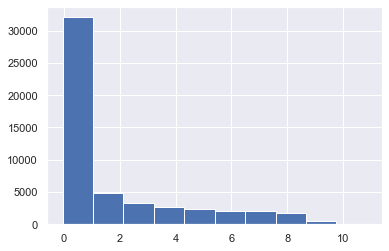

In [39]:
submission['UV'].hist()    

In [44]:
pred_hhnn = pred_.copy()

In [45]:
pred_hhnn.columns

Index(['yyyymmdd', 'hhnn', 'stn', 'Lon', 'Lat', 'UV', 'Band1', 'Band2',
       'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'Band8', 'Band9', 'Band10',
       'Band11', 'Band12', 'Band13', 'Band14', 'Band15', 'Band16', 'SolarZA',
       'SateZA', 'ESR', 'Height', 'LandType', 'total_cloud', 'ml_cloud'],
      dtype='object')

In [46]:
condition1 = (pred_hhnn.hhnn <=550) & (pred_hhnn.hhnn >= 0)
pred_hhnn.loc[condition1, 'UV']=0

In [47]:
condition2 = (pred_hhnn.hhnn <=2350) & (pred_hhnn.hhnn >= 2000)
pred_hhnn.loc[condition2, 'UV']=0

In [48]:
pred_hhnn['UV'].head(100)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: UV, Length: 100, dtype: float64

In [49]:
submission = pd.read_csv('./1-1_검증데이터셋_수정.csv')

In [50]:
submission['UV']=pred_hhnn[['UV']]
submission

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.0
1,202206010000,105,0.0
2,202206010000,108,0.0
3,202206010000,112,0.0
4,202206010000,115,0.0
...,...,...,...
51850,202206250000,146,0.0
51851,202206250000,152,0.0
51852,202206250000,156,0.0
51853,202206250000,159,0.0


<AxesSubplot:>

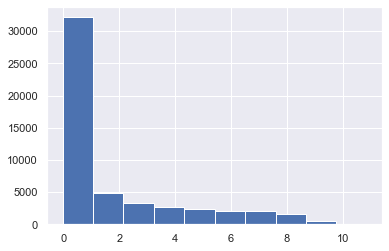

In [51]:
submission['UV'].hist()    

In [52]:
sub_abs = submission.abs()
sub_abs

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.0
1,202206010000,105,0.0
2,202206010000,108,0.0
3,202206010000,112,0.0
4,202206010000,115,0.0
...,...,...,...
51850,202206250000,146,0.0
51851,202206250000,152,0.0
51852,202206250000,156,0.0
51853,202206250000,159,0.0


<AxesSubplot:>

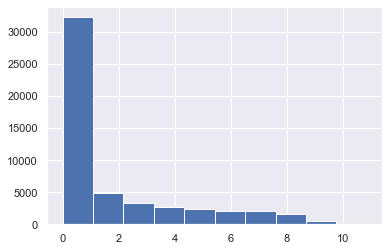

In [53]:
sub_abs['UV'].hist()    

In [54]:
sub_abs.to_csv('220224_abs_cloud_lgbm_optuna.csv', index=False)